In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

from classy import Class


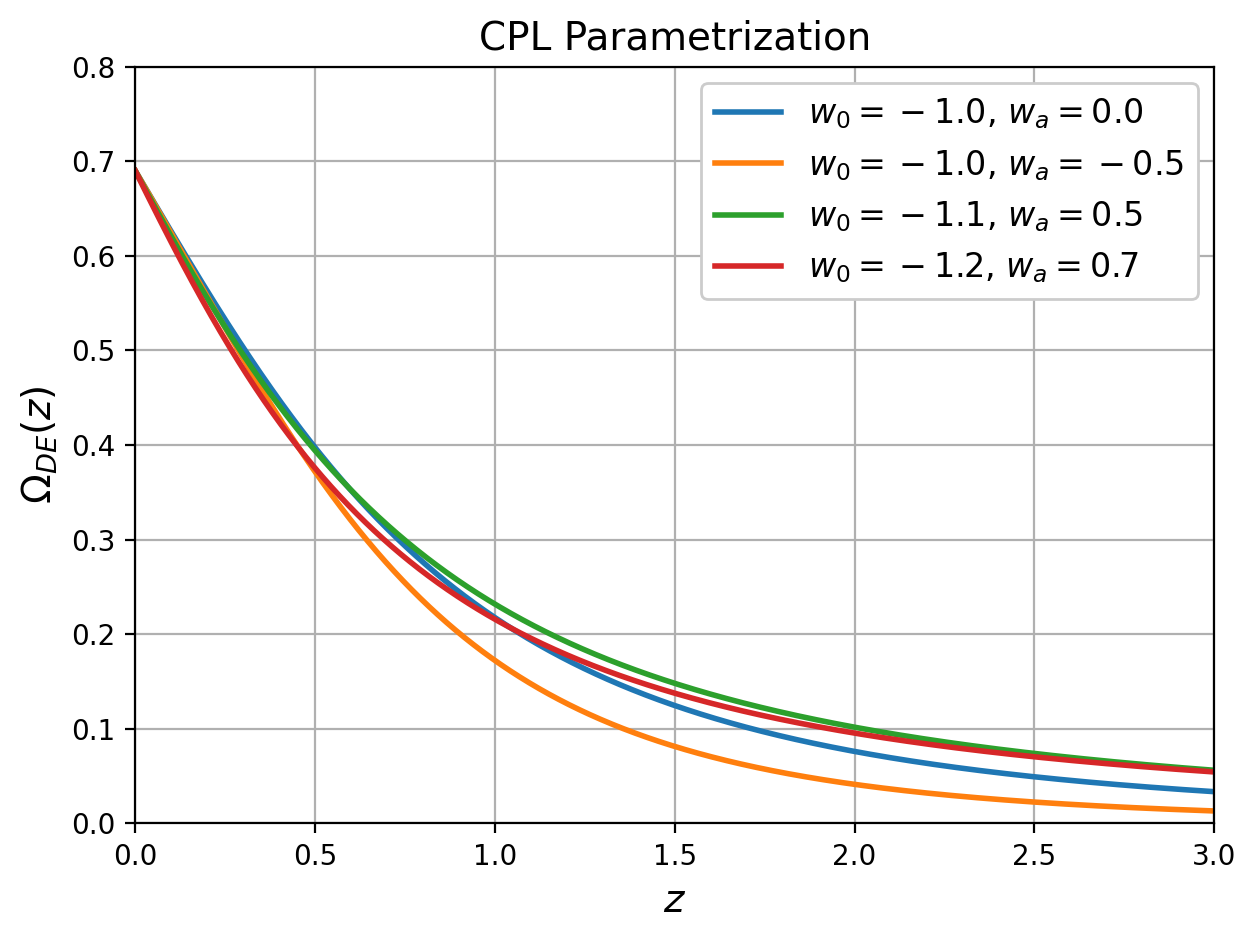

In [2]:
# Define matched parameter pairs (w0, wa)
param_pairs = [
    (-1.0, 0.0),   
    (-1.0, -0.5),   
    (-1.1, 0.5),
    (-1.2,0.7)
]

plt.xlim(0, 3)
plt.ylim(0, 0.8) 
plt.xlabel('$z$', fontsize=14)
plt.ylabel(r'$\Omega_{DE}(z)$', fontsize=14)
plt.grid()



# Loop through parameter pairs
for idx, (w0, wa) in enumerate(param_pairs):
    # Initialize CLASS
    cosmo_cpl = Class()
    cosmo_cpl.set({
        'w0_fld': w0,
        'wa_fld': wa,
        'Omega_Lambda': 0.,  # Pure CPL dark energy
        'output': 'tCl mPk dTk vTk',
        'k_output_values': '0.5',
        'non linear': 'halofit'
    })
    cosmo_cpl.compute()
    
    # Get background quantities
    ba_cpl = cosmo_cpl.get_background()
    
    # Calculate Ω_DE(z)
    omega_de = ba_cpl['(.)rho_fld']/ba_cpl['(.)rho_crit']
    
    # Plot with unique style
    plt.plot(ba_cpl['z'], omega_de,
             lw=2,
             label=f'$w_0={w0}$, $w_a={wa}$')

plt.legend(fontsize=12, framealpha=1)
plt.title('CPL Parametrization', fontsize=14)
plt.tight_layout()
plt.show()

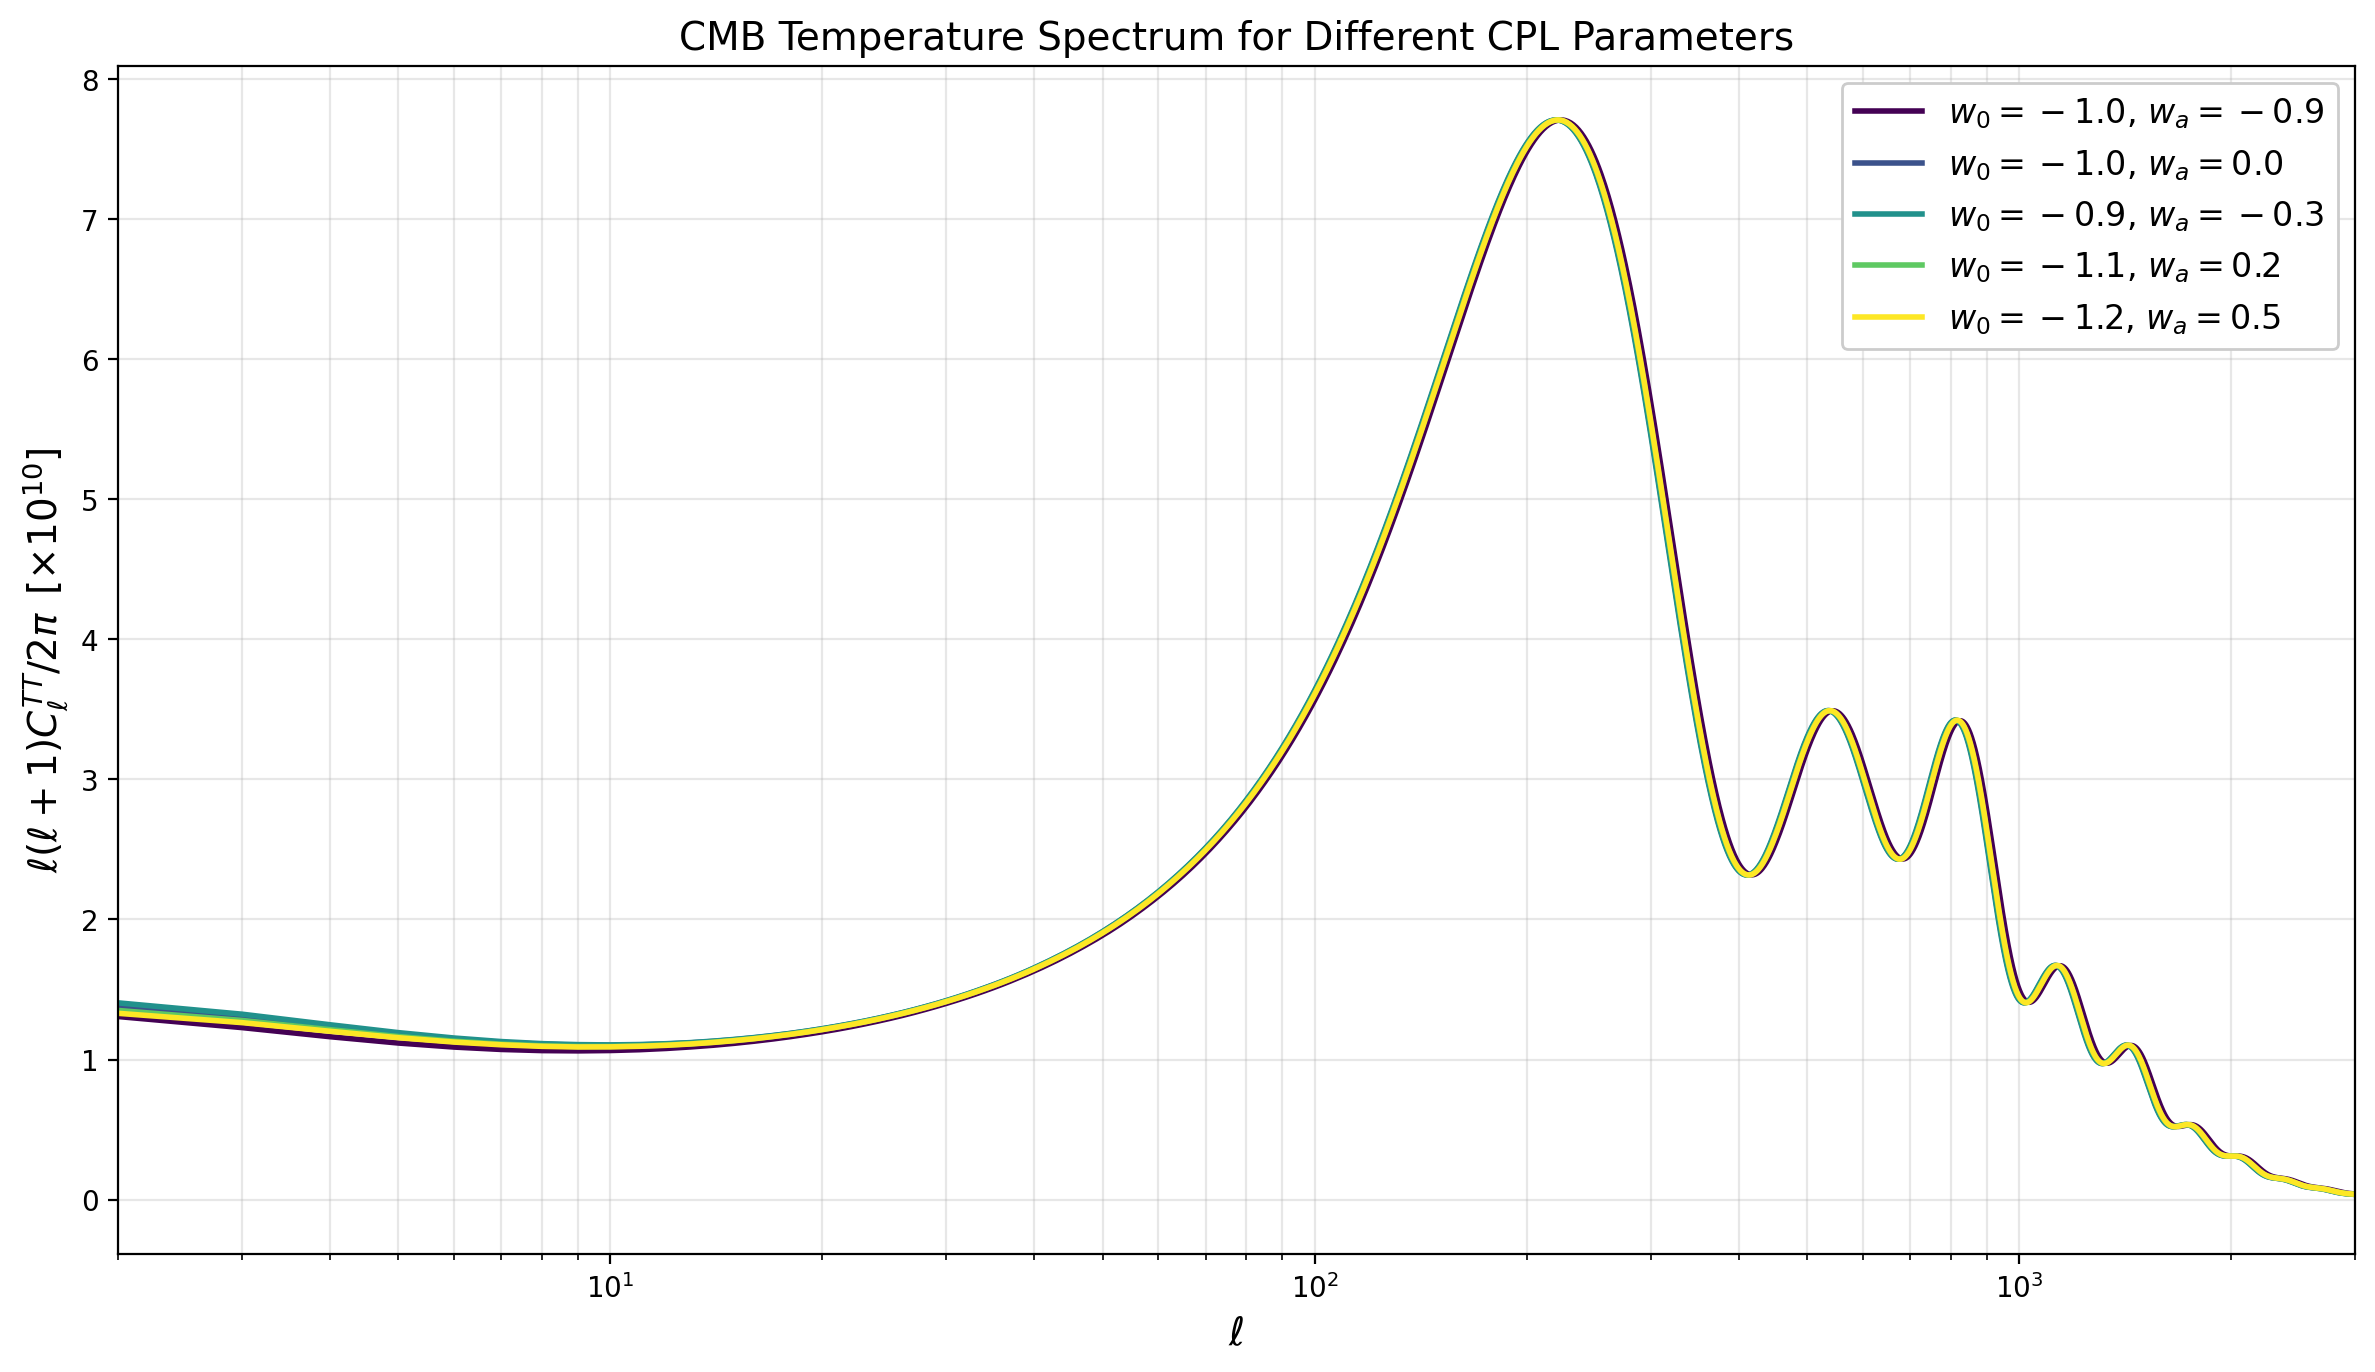

In [3]:
common_settings = {
    'h': 0.67810,
    'omega_b': 0.02238280,
    'omega_cdm': 0.1201075,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'output': 'tCl,pCl,lCl',
    'lensing': 'yes',
    'l_max_scalars': 3000,
    'T_cmb': 2.7255
}

# CPL parameter combinations to test
param_pairs = [
    (-1.0, -0.9),
    (-1.0, 0.0),    # Cosmological constant (ΛCDM)
    (-0.9, -0.3),   # Quintessence-like
    (-1.1, 0.2),    # Phantom crossing
    (-1.2, 0.5)     # Strongly evolving phantom
]

plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(param_pairs)))

for idx, (w0, wa) in enumerate(param_pairs):
    M = Class()
    
    # Update parameters with CPL values
    current_params = common_settings.copy()
    current_params.update({
        'w0_fld': w0,
        'wa_fld': wa,
        'Omega_Lambda': 0.  # Pure CPL dark energy
    })
    
    try:
        M.set(current_params)
        M.compute()
        
        # Get power spectra
        cl_lensed = M.lensed_cl(3000)
        ell = cl_lensed['ell']
        
        # Calculate scaled spectrum (in 10^10 units)
        factor = 1e10 * ell * (ell + 1) / (2 * np.pi)
        cl_tt = factor * cl_lensed['tt']
        
        plt.semilogx(ell, cl_tt, 
                    color=colors[idx],
                    lw=2,
                    label=f'$w_0={w0}$, $w_a={wa}$')
        
    except Exception as e:
        print(f"Error for w0={w0}, wa={wa}: {str(e)}")
    finally:
        M.struct_cleanup()

# Plot formatting
plt.xlim(2, 3000)
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$\ell (\ell+1) C_\ell^{TT} / 2 \pi \,\,\, [\times 10^{10}]$", fontsize=14)
plt.title("CMB Temperature Spectrum for Different CPL Parameters", fontsize=14)
plt.grid(True, which="both", alpha=0.3)
plt.legend(fontsize=12, framealpha=1)
plt.tight_layout()
plt.show()

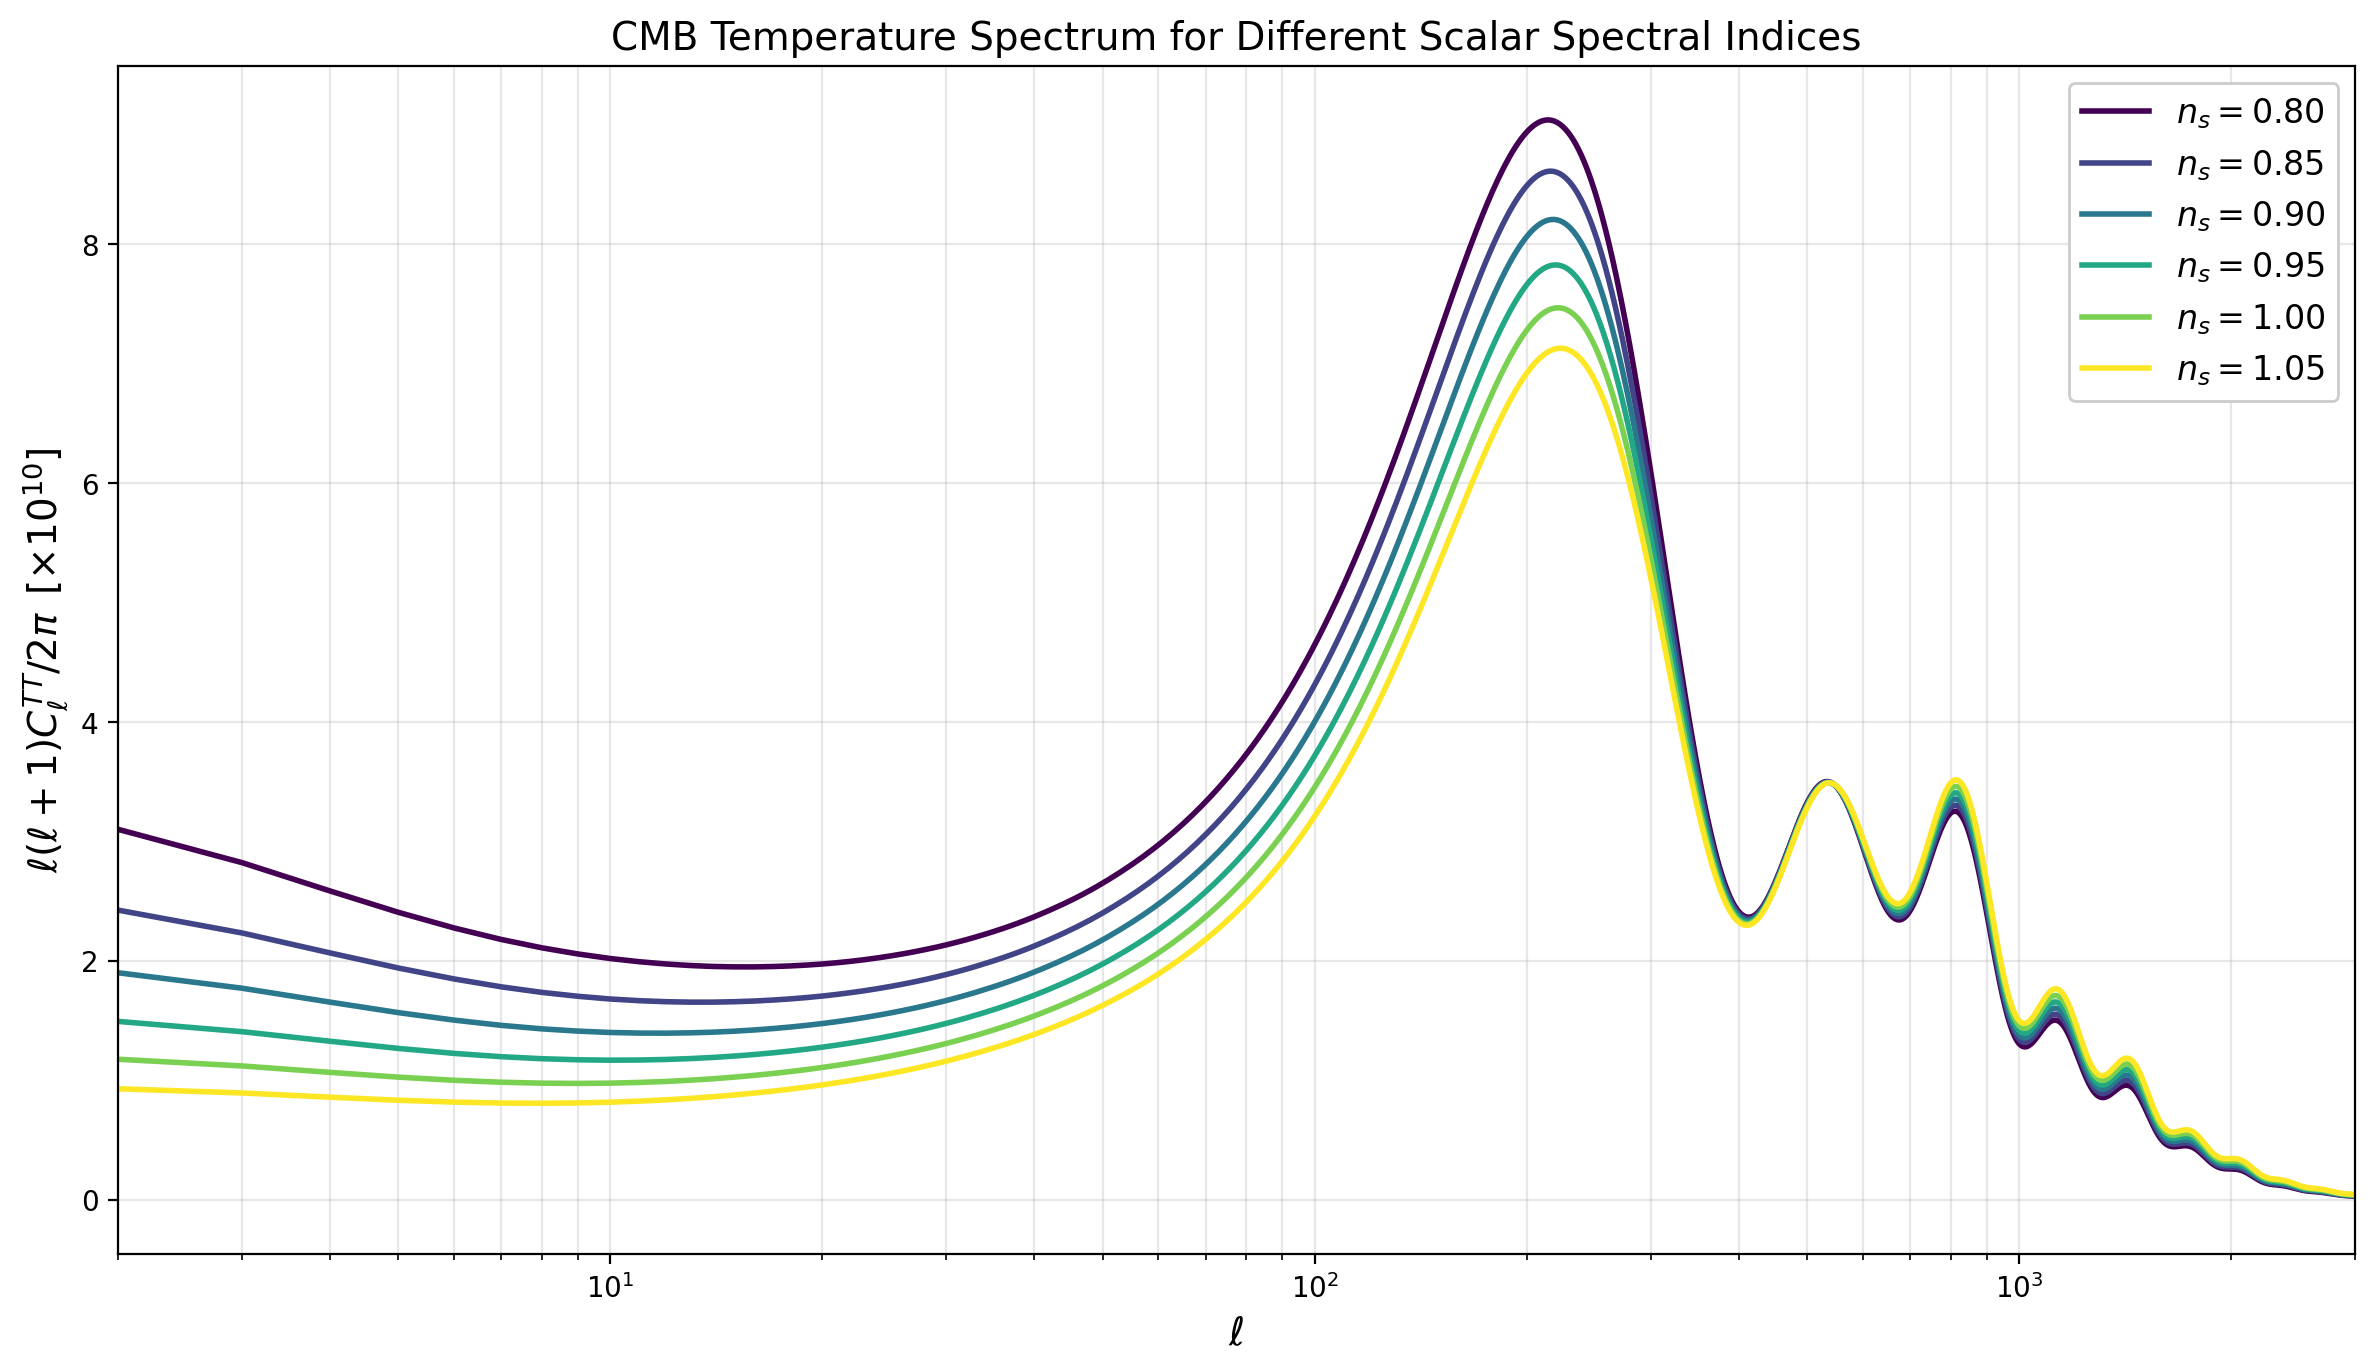

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

# Common cosmological parameters
common_settings = {
    'h': 0.67810,
    'omega_b': 0.02238280,
    'omega_cdm': 0.1201075,
    'A_s': 2.100549e-09,
    'tau_reio': 0.05430842,
    'output': 'tCl,pCl,lCl',
    'lensing': 'yes',
    'l_max_scalars': 3000,
    'T_cmb': 2.7255
}

# Values of n_s to test (from 0.8 to 1.05)
n_s_values = np.linspace(0.8, 1.05, 6)  # [0.8, 0.85, 0.9, 0.95, 1.0, 1.05]

plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_s_values)))

for idx, n_s in enumerate(n_s_values):
    # Update parameters with current n_s
    current_params = common_settings.copy()
    current_params['n_s'] = n_s
    
    M = Class()
    try:
        M.set(current_params)
        M.compute()
        
        # Get power spectra
        cl_lensed = M.lensed_cl(3000)
        ell = cl_lensed['ell']
        
        # Calculate scaled spectrum (in 10^10 units)
        factor = 1e10 * ell * (ell + 1) / (2 * np.pi)
        cl_tt = factor * cl_lensed['tt']
        
        plt.semilogx(ell, cl_tt, 
                    color=colors[idx],
                    lw=2,
                    label=f'$n_s={n_s:.2f}$')
        
    except Exception as e:
        print(f"Error for n_s={n_s:.2f}: {str(e)}")
    finally:
        M.struct_cleanup()

# Plot formatting
plt.xlim(2, 3000)
plt.xlabel(r"$\ell$", fontsize=14)
plt.ylabel(r"$\ell (\ell+1) C_\ell^{TT} / 2 \pi \,\,\, [\times 10^{10}]$", fontsize=14)
plt.title("CMB Temperature Spectrum for Different Scalar Spectral Indices", fontsize=14)
plt.grid(True, which="both", alpha=0.3)
plt.legend(fontsize=12, framealpha=1)
plt.tight_layout()
plt.show()